## Import

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%run naturalGas_Wrangling.ipynb

## Electric Energy Forecast

In [10]:
ts_energy = energy_source.df.sum(axis=1).to_frame('GWh')

# Creating datetime index
dt = pd.date_range('1/1/2000', periods=228, freq='M')

# Inserting and Changing ts_energy index
ts_energy.insert(0,'Date',dt)
ts_energy.reset_index(inplace=True)
ts_energy.index = ts_energy['Date']
ts_energy.drop(['Year','Month','Date'], axis=1, inplace=True)

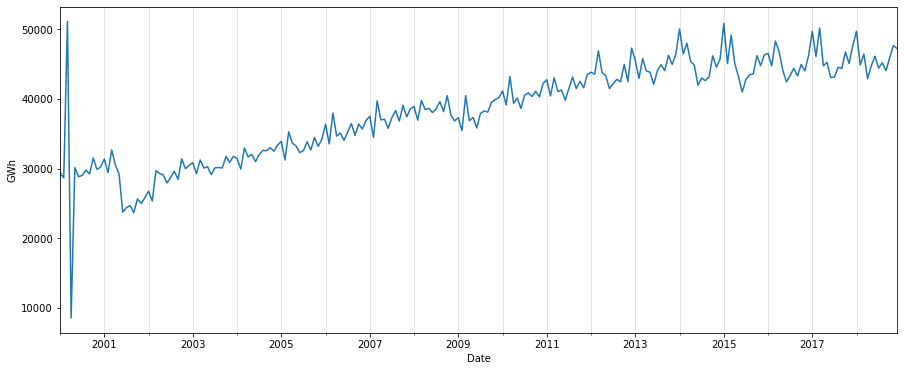

In [105]:
ts_energy.plot(figsize=(15,6))
plt.legend().remove()
plt.ylabel('GWh')
for year in range(2000,2019):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.3, lw=0.5)

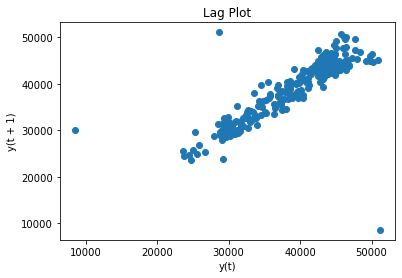

In [41]:
# Plotting the electry energy production data (t) on the x-axis against the electry energy production on the previous month (t-1) on y-axis

lag_plot(ts_energy)
plt.title('Lag Plot')
plt.show()

In [90]:
# Anual Data Correlation 
values = pd.DataFrame(ts_energy.values).copy()
dataframe = pd.concat([values.shift(12), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.00000,0.91207
t+1,0.91207,1.00000


In [91]:
# Month Data Correlation
values = pd.DataFrame(ts_energy.values).copy()
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.824236
t+1,0.824236,1.000000


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

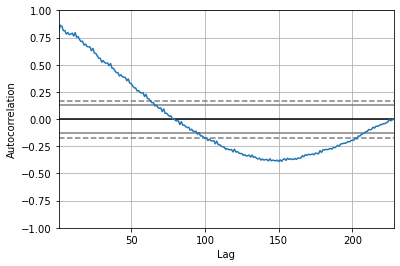

In [23]:
pd.plotting.autocorrelation_plot(ts_energy)

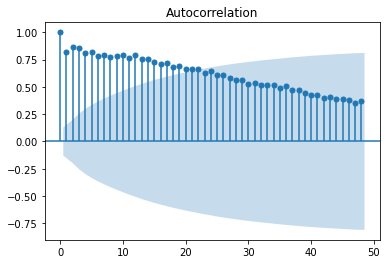

In [92]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ts_energy.values.squeeze(), lags=48);
#pd.plotting.plot_acf(ts_energy, lags=12)

## Hydroelectric Energy

In [112]:
ts_hydro = energy_source.df.loc[:,'Hydroelectric'].to_frame('GWh')

# Creating datetime index
dt = pd.date_range('1/1/2000', periods=228, freq='M')

# Inserting and Changing ts_hydro index
ts_hydro.insert(0,'Date',dt)
ts_hydro.reset_index(inplace=True)
ts_hydro.index = ts_hydro['Date']
ts_hydro.drop(['Year','Month','Date'], axis=1, inplace=True)

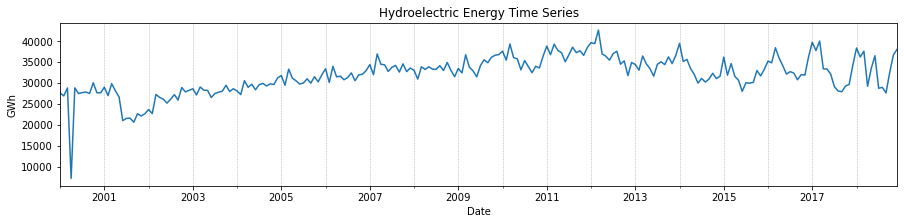

In [123]:
ts_hydro.plot(figsize=(15,3))
plt.legend().remove()
plt.title('Hydroelectric Energy Time Series')
plt.ylabel('GWh')
for year in range(2000,2019):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.3, lw=0.5)

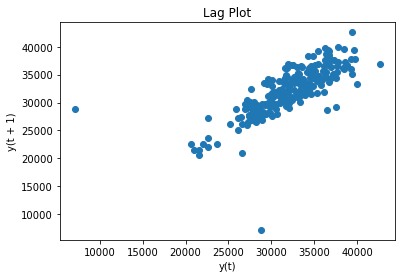

In [121]:
# Plotting the electry energy production data (t) on the x-axis against the electry energy production on the previous month (t-1) on y-axis

lag_plot(ts_hydro)
plt.title('Lag Plot')
plt.show()

In [122]:
# Month Data Correlation
values = pd.DataFrame(ts_hydro.values).copy()
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.764015
t+1,0.764015,1.000000
